In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "..")
import os
from fastai.vision.all import *
from fastai import *
from tsai.all import *
from configs import DatasetConfiguration
from wavhandler import make_df_parallel

In [3]:
print('univariate datasets: ', get_UCR_univariate_list())

univariate datasets:  ['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'In

In [4]:
path = "/home/kalfasyan/data/wingbeats/Melanogaster_RL/"
BASE_DATADIR = Path(path)
mypath = Path(path)

In [5]:
dconf = DatasetConfiguration(names=['LG'])
dconf.select_all()
dconf.read()

Dataset - LG - exists: True


In [33]:
# L(dconf.fnames.tolist())
nr_of_wavs = dconf.fnames.shape[0]
split_pct = 0.8
split_end = round(nr_of_wavs*split_pct)

splits = (L(range(0,split_end)), L(range(split_end,nr_of_wavs)))
splits

((#10197) [0,1,2,3,4,5,6,7,8,9...],
 (#2549) [10197,10198,10199,10200,10201,10202,10203,10204,10205,10206...])

In [34]:
tfms = [None, Categorize()]

In [35]:
X = make_df_parallel(names=dconf.fnames.tolist(), setting='rawflt')
y = dconf.labels.values

In [36]:
X = np.expand_dims(X.values, axis=1)
X.shape

(12746, 1, 5000)

In [37]:
# TSDatasets??

In [38]:
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#12746) [(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0)),(TSTensor(vars:1, len:5000), TensorCategory(0))...]

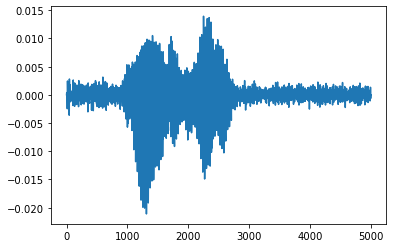

In [40]:
plt.plot(X[1].T)

In [13]:
dsets.valid

(#2549) [(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1)),(TSTensor(vars:1, len:5000), TensorCategory(1))...]

In [14]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[32,64], num_workers=8)

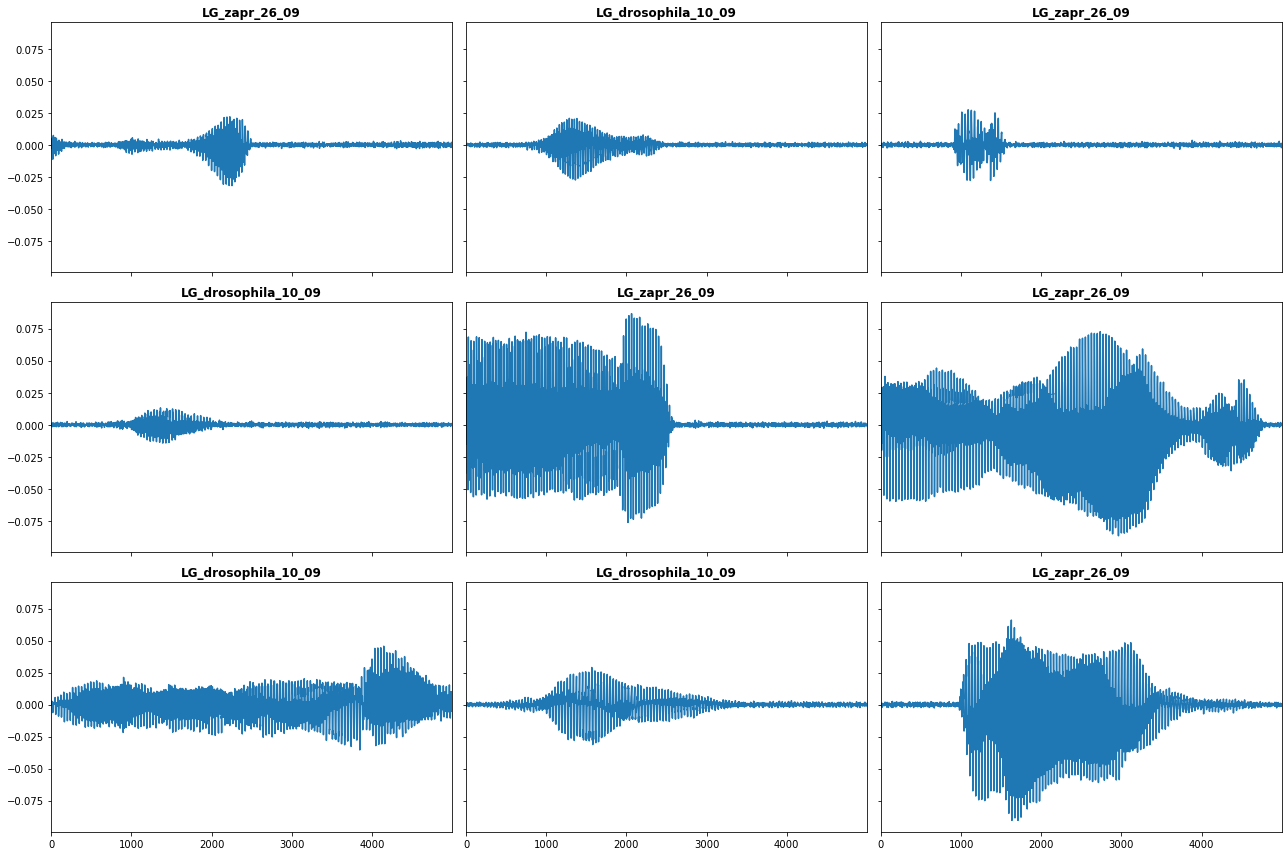

In [15]:
dls.show_batch(sharey=True)

In [16]:
# dls.dataloaders

In [17]:
model = InceptionTime(dls.vars, dls.c)

In [18]:
learn = Learner(dls, model, metrics=accuracy)

In [19]:
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(lr_min=0.15848932266235352, lr_steep=0.00015848931798245758)

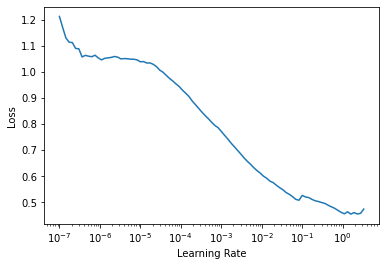

In [20]:
learn.lr_find(suggestions=True)

In [21]:
learn.fit_one_cycle(5, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.102558,0.085915,0.980384,00:48
1,0.065913,0.076675,0.970184,00:48
2,0.034864,0.003057,0.999608,00:48
3,0.028664,0.026576,0.994900,00:48
4,0.022573,0.016938,0.996077,00:48
